# 09 Кластеризация. Пшенин Владислав Игоревич 6133

In [41]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, completeness_score, homogeneity_score, v_measure_score

## Найти датасет для кластеризации: для этого берём датасет для мультиклассовой классификации и временно убираем метки классов. 

In [5]:
# Read the data and create DataFrame from it
data = pd.read_csv('Fish.csv')
data['Species'] = pd.factorize(data['Species'])[0]

https://www.kaggle.com/aungpyaeap/fish-market
# Fish market
## Database of common fish species for fish market
### Columns
Species
species name of fish <br>
Weight
weight of fish in Gram g <br>
Length1
vertical length in cm <br>
Length2
diagonal length in cm <br>
Length3
cross length in cm <br>
Height
height in cm <br>
Width
diagonal width in cm <br>

In [6]:
Y = data['Species'].values 
dataNew = data.drop(['Species'], axis=1)
dataNew.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


## Производим иерархическую агломеративную кластеризацию (scipy.cluster.hierarchy), строим график-дендрограмму (hierarchy.dendrogram)

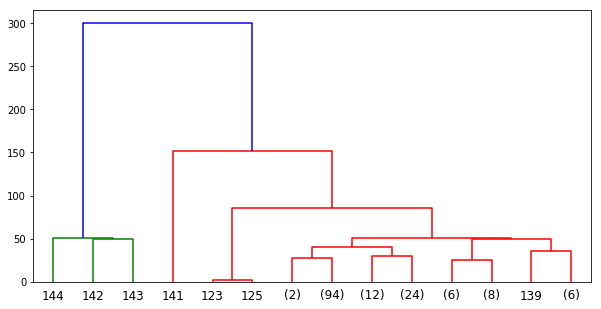

In [7]:
# pdist посчитает нам верхний треугольник матрицы попарных расстояний
distance_mat = pdist(dataNew)
# linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, p=5, truncate_mode='level')

## На том же датасете производим кластеризацию, используя любой другой метод кластеризации (пока с произвольными гиперпараметрами)

In [8]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(dataNew)

KMeans(n_clusters=7, random_state=0)

In [9]:
# ARI
adjusted_rand_score(Y, kmeans.labels_)

0.12895470049903135

In [10]:
# AMI
adjusted_mutual_info_score(Y, kmeans.labels_)

0.25447683049804126

In [11]:
# Completeness
completeness_score(Y, kmeans.labels_)

0.2991617851894057

## Произвести оптимизацию гиперпараметров кластеризации

In [30]:
score = []

for i in range(2, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, random_state=0)
    kmeans.fit(dataNew)
    ari = adjusted_rand_score(Y, kmeans.labels_)
    print(i,ari)
    score.append(ari)

2 0.023251641839538182
3 0.0900939604305191
4 0.1058440838997736
5 0.12105419814934092
6 0.10516130335142544
7 0.12895470049903135
8 0.12629751594966102
9 0.13212514903484984
10 0.11328840332365803
11 0.14139748262467042
12 0.12413230003831027
13 0.12815888857709443
14 0.1093504493609765
15 0.10653143950180445
16 0.11123248543843704
17 0.11365772225682694
18 0.1127273002089639
19 0.10215136017505383
20 0.10392453594664848
21 0.10578124126102276
22 0.1050382100696395
23 0.10403337293644406
24 0.10442129989988698
25 0.10047737945496157
26 0.09733228939913814
27 0.08567945068066053
28 0.08615420942972747
29 0.08512021062402299
30 0.08805887603119018
31 0.0875390918956888
32 0.08756978452925461
33 0.08916738561792874
34 0.08936296543126086
35 0.09282146736662279
36 0.09326657752599159
37 0.08963757802924797
38 0.08854320690711173
39 0.07804608625290775
40 0.07869232200260447
41 0.07910840086192832
42 0.07902480940297867
43 0.07811081792959193
44 0.06506382249073712
45 0.06538479408360284
4

In [33]:
# best n_clusters
print('best n_clusters:',score.index(max(score))+2,'best ari:',max(score))

best n_clusters: 11 best ari: 0.14139748262467042


## Используя алгоритм/модель из п. 2 произвести оптимизацию гиперпараметра количества кластеров, используя "правило локтя" (анализируем график силуэта)

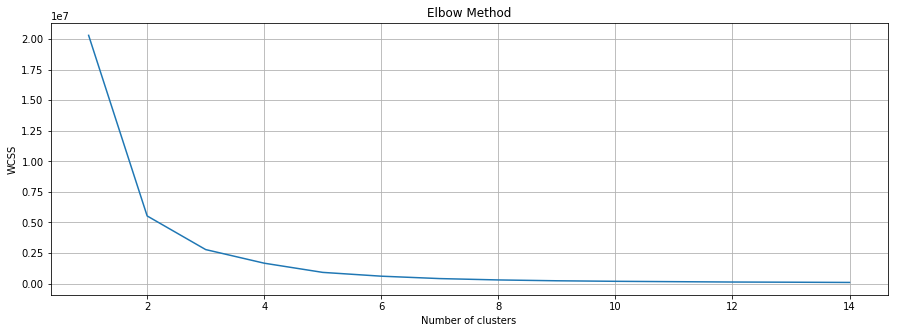

In [37]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(dataNew)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

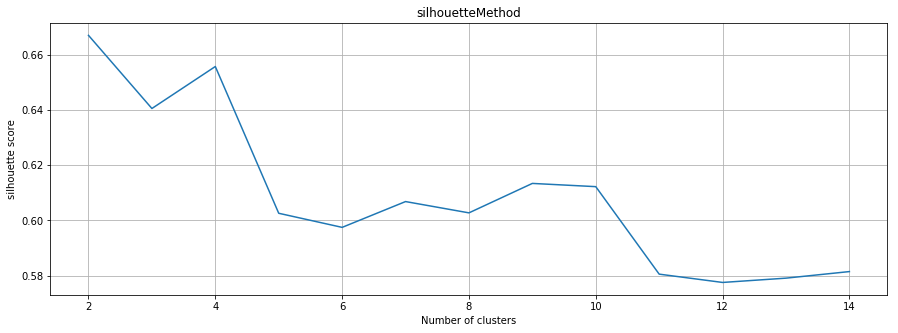

In [47]:
silhouette = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(dataNew)
    silhouette.append(metrics.silhouette_score(dataNew, kmeans.labels_))
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(range(2, 15), silhouette)
plt.title('silhouetteMethod')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

## Произведем обучение модели с n_clusters=4

In [67]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300)
kmeans.fit(dataNew)

KMeans(n_clusters=4)

In [68]:
# ARI
adjusted_rand_score(Y, kmeans.labels_)

0.1058440838997736

In [69]:
# AMI
adjusted_mutual_info_score(Y, kmeans.labels_)

0.20331767489934896

In [70]:
# Completeness
completeness_score(Y, kmeans.labels_)

0.3197339603017692